#XOR Neural network

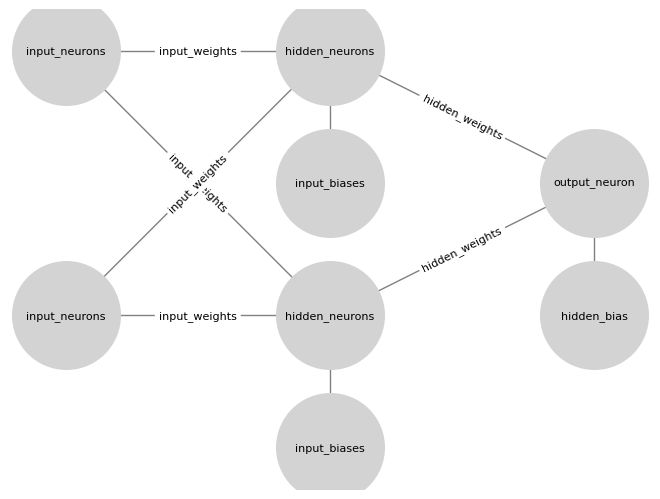

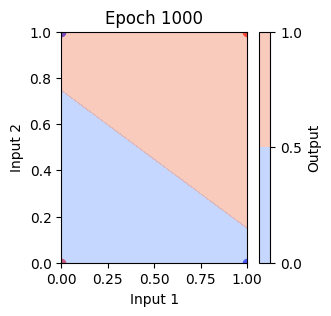

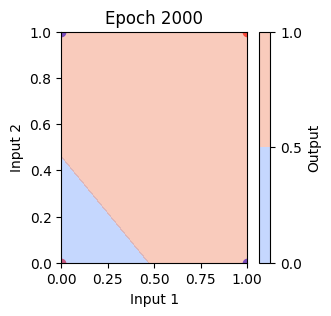

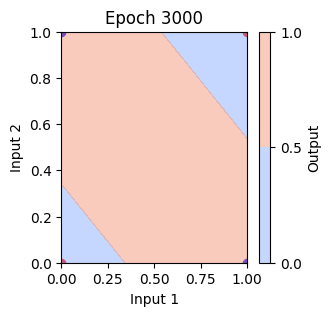

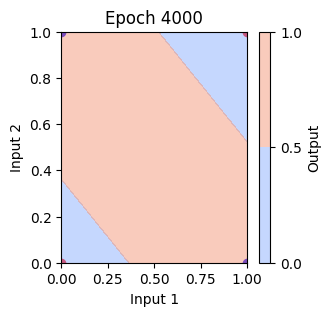

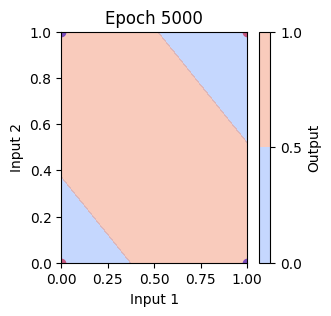

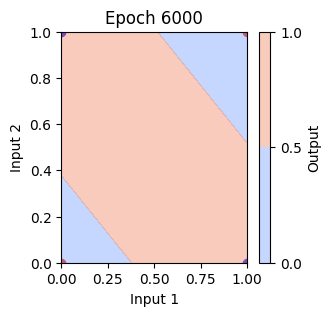

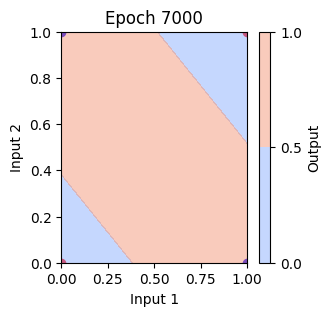

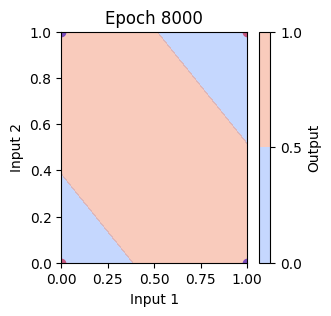

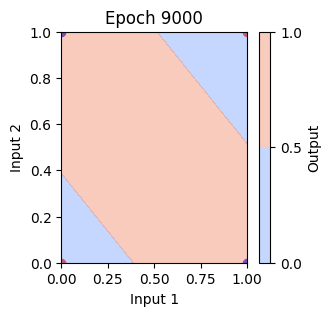

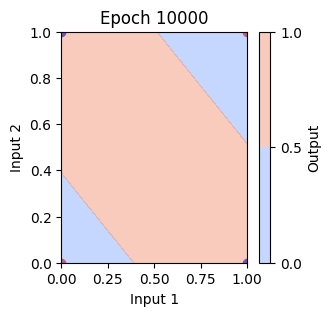

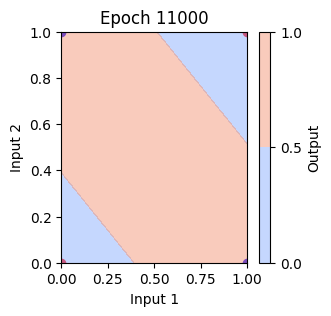

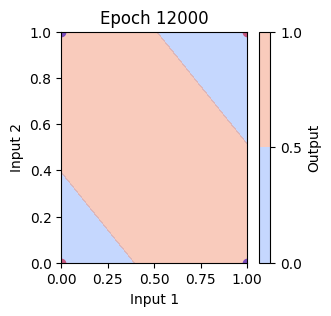

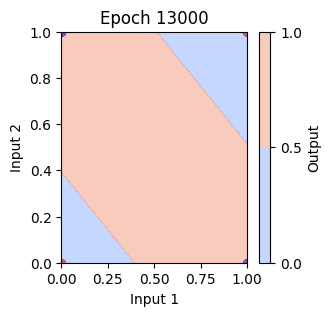

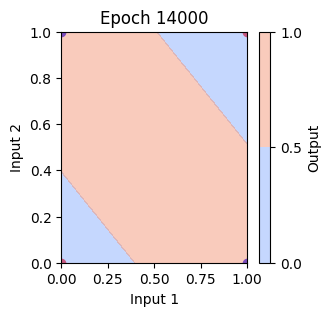

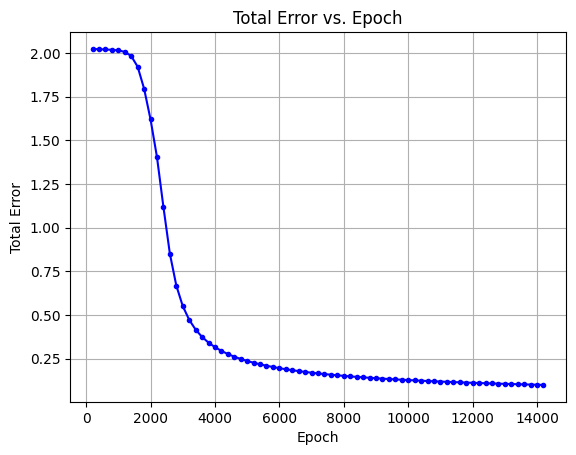

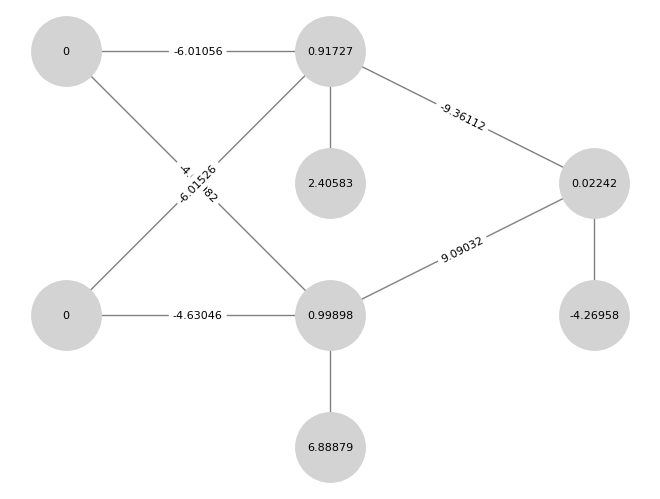

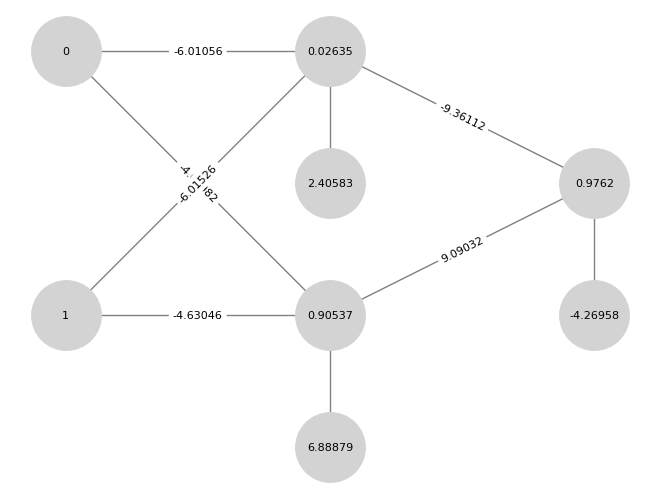

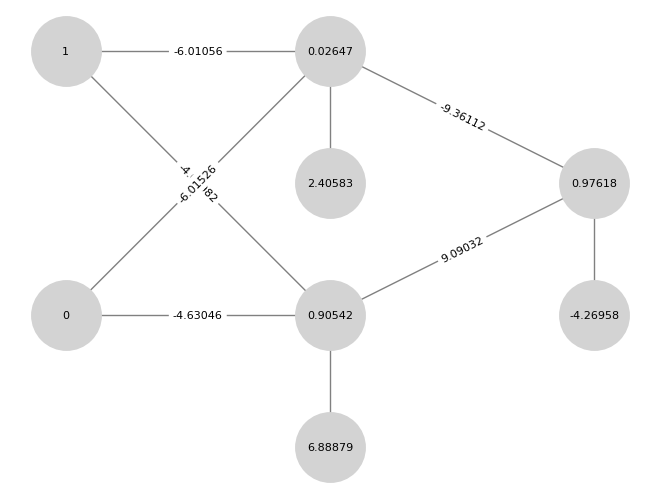

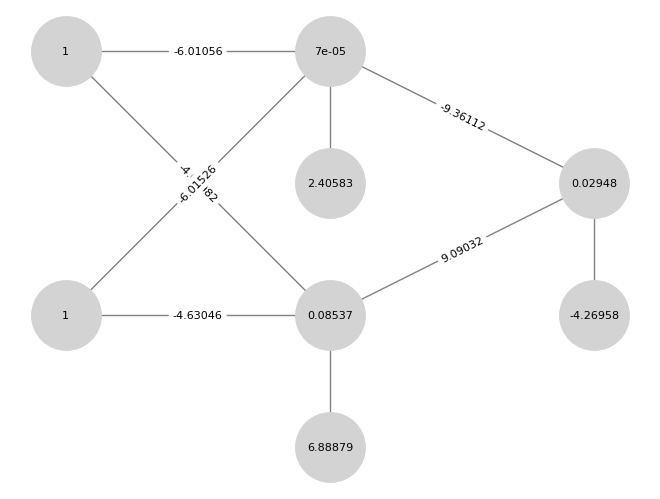

Input: [0 0], Predicted Output: 0.022418307119145227, Rounded Output: 0.02242, Expected Output: 0
Input: [0 1], Predicted Output: 0.976195438462865, Rounded Output: 0.9762, Expected Output: 1
Input: [1 0], Predicted Output: 0.97618075235486, Rounded Output: 0.97618, Expected Output: 1
Input: [1 1], Predicted Output: 0.029479377914057723, Rounded Output: 0.02948, Expected Output: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#NEURAL NETWORK GRAPH
G = nx.Graph()
G.add_edges_from([(1, 3), (1, 4), (2, 3), (2, 4), (3, 7), (4, 7), (5, 3), (6, 4), (8,7)])

pos = {1: (0, 1.5), 2: (0, 0.5), 3: (1, 1.5), 4: (1, 0.5), 5: (1, 1), 6: (1, 0), 7: (2, 1), 8: (2, 0.5)}

node_labels = {1: "input_neurons",
               2: "input_neurons",
               3: "hidden_neurons",
               4: "hidden_neurons",
               5: "input_biases",
               6: "input_biases",
               7: "output_neuron",
               8: "hidden_bias"}
edge_labels = { (1, 3): "input_weights",
                (1, 4): "input_weights",
                (2, 3): "input_weights",
                (2, 4): "input_weights",
                (3, 7): "hidden_weights",
                (4, 7): "hidden_weights"}

# Draw the graph with fixed layout and labels
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=6000, node_color="lightgrey", font_size=8, font_color="black", edge_color="gray")

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="black")

plt.show()

#XOR NEURAL NETWORK
# Initialize weights and biases randomly
input_weights = np.random.uniform(low=-1, high=1, size=(2, 2))
input_biases = np.random.uniform(low=-1, high=1, size=(1, 2))
hidden_weights = np.random.uniform(low=-1, high=1, size=(2, 1))
hidden_bias = np.random.uniform(low=-1, high=1, size=(1, 1))

# Store epoch and total error for plotting
epochsplot = []  # List to store epochs
errorsplot = []  # List to store total errors

# Training
learning_rate = 0.2
epochs = 100001
plot_interval = 1000

# Loop through epochs for training
for epoch in range(1, epochs):
    total_error = 0

    # Loop through all possible input combinations (0, 0), (0, 1), (1, 0), (1, 1)
    for x in range(2):
        for y in range(2):
            input_neurons = np.array([[x, y]])

            # Forward pass
            hidden_neurons = 1 / (1 + np.exp(-(np.dot(input_neurons, input_weights) + input_biases)))
            output_neuron = 1 / (1 + np.exp(-(np.dot(hidden_neurons, hidden_weights) + hidden_bias)))

            # Error calculation
            error = output_neuron - int(x ^ y)  # XOR operation for expected output
            total_error += abs(error)

            # Backpropagation
            output_delta = error * output_neuron * (1 - output_neuron)
            hidden_error = output_delta.dot(hidden_weights.T)
            hidden_delta = hidden_error * hidden_neurons * (1 - hidden_neurons)

            # Update weights and biases
            hidden_weights -= learning_rate * hidden_neurons.T.dot(output_delta)
            hidden_bias -= learning_rate * np.sum(output_delta, axis=0)
            input_weights -= learning_rate * input_neurons.reshape(-1, 1).dot(hidden_delta)
            input_biases -= learning_rate * np.sum(hidden_delta, axis=0)

    # Store epoch and total error for plotting
    if epoch % 200 == 0:
        epochsplot.append(epoch)
        errorsplot.append(total_error)

        # Check if the total error is below the threshold
        if total_error < 0.1:
            break

    # Plot contour every plot_interval epochs
    if epoch % plot_interval == 0:
        plt.figure(figsize=(3, 3))
        plt.title(f"Epoch {epoch}")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")

        # Plot input points
        for x in range(2):
            for y in range(2):
                plt.scatter(x, y, marker='o', c='blue' if int(x ^ y) == 1 else 'red')

        # Calculate output values for contour plot
        x_vals = np.linspace(0, 1, 100)
        y_vals = np.linspace(0, 1, 100)
        Z = np.zeros((len(x_vals), len(y_vals)))
        for i, x in enumerate(x_vals):
            for j, y in enumerate(y_vals):
                hidden_neurons = 1 / (1 + np.exp(-(np.dot(np.array([x, y]), input_weights) + input_biases)))
                output_neuron = float(1 / (1 + np.exp(-(np.dot(hidden_neurons, hidden_weights) + hidden_bias))))
                Z[i, j] = output_neuron

        # Plot contour
        plt.contourf(x_vals, y_vals, Z.T, levels=[0, 0.5, 1], alpha=0.5, cmap='coolwarm')
        plt.colorbar(label='Output')

        plt.show()

# Plotting the total error vs. epoch
epochsplot = np.array(epochsplot)
errorsplot = np.array(errorsplot)

epochsplot = epochsplot.flatten()
errorsplot = errorsplot.flatten()

plt.plot(epochsplot, errorsplot, marker='.', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Total Error vs. Epoch')
plt.grid(True)
plt.show()


# Test the trained network on all input combinations
for x in range(2):
    for y in range(2):
        input_neurons = np.array([[x, y]])
        hidden_neurons = 1 / (1 + np.exp(-(np.dot(input_neurons, input_weights) + input_biases)))
        output_neuron = float(1 / (1 + np.exp(-(np.dot(hidden_neurons, hidden_weights) + hidden_bias))))
        rounded_output_neuron = round(output_neuron, 5)  # Convert to scalar and round

        # Update node and edge labels
        node_labels = {
            1: input_neurons[0, 0],
            2: input_neurons[0, 1],
            3: round(hidden_neurons[0, 0], 5),
            4: round(hidden_neurons[0, 1], 5),
            5: round(input_biases[0][0], 5),
            6: round(input_biases[0][1], 5),
            7: rounded_output_neuron,
            8: round(hidden_bias[0][0], 5)
        }

        edge_labels = {
            (1, 3): round(input_weights[0][0], 5),
            (1, 4): round(input_weights[0][1], 5),
            (2, 3): round(input_weights[1][0], 5),
            (2, 4): round(input_weights[1][1], 5),
            (3, 7): round(hidden_weights[0][0], 5),
            (4, 7): round(hidden_weights[1][0], 5)
        }

        # Update and draw the graph
        G = nx.Graph()
        G.add_edges_from([(1, 3), (1, 4), (2, 3), (2, 4), (3, 7), (4, 7), (5, 3), (6, 4), (8, 7)])

        pos = {1: (0, 1.5), 2: (0, 0.5), 3: (1, 1.5), 4: (1, 0.5), 5: (1, 1), 6: (1, 0), 7: (2, 1), 8: (2, 0.5)}

        nx.draw(
            G, pos, with_labels=True, labels=node_labels, node_size=2500, node_color="lightgrey",
            font_size=8, font_color="black", edge_color="gray"
        )

        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color="black")

        plt.show()

#Give the final results
for x in range(2):
    for y in range(2):
        input_neurons = np.array([[x, y]])
        hidden_neurons = 1 / (1 + np.exp(-(np.dot(input_neurons, input_weights) + input_biases)))
        output_neuron = float(1 / (1 + np.exp(-(np.dot(hidden_neurons, hidden_weights) + hidden_bias))))
        rounded_output_neuron = round(output_neuron, 5)
        expected_output = int(input_neurons[0][0] ^ input_neurons[0][1])
        print(f"Input: {input_neurons[0]}, Predicted Output: {output_neuron}, Rounded Output: {rounded_output_neuron}, Expected Output: {expected_output}")